In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import seaborn as sns


In [2]:
import pandas as pd

data = {"X": [12, 15, 18, 11, 10, 8, 9, 12, 18, 20, 19, 21],
        "Y": [6, 16, 17, 8, 7, 8, 6, 9, 15, 18, 16, 19]}

df = pd.DataFrame(data)
print(df)


     X   Y
0   12   6
1   15  16
2   18  17
3   11   8
4   10   7
5    8   8
6    9   6
7   12   9
8   18  15
9   20  18
10  19  16
11  21  19


C:\Users\sarth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sarth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


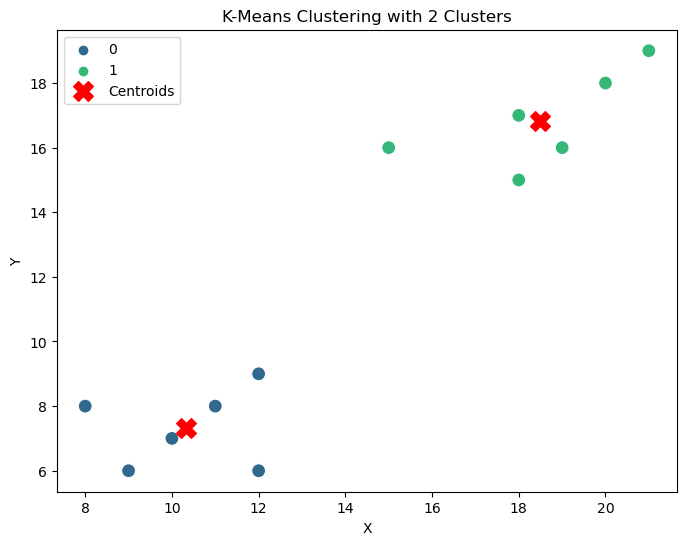

In [3]:
# Define the number of clusters
num_clusters = 2

# Create and fit the KMeans model
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df["Cluster"] = kmeans.fit_predict(df)

# Plot the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x="X", y="Y", hue="Cluster", data=df, palette="viridis", s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title(f'K-Means Clustering with {num_clusters} Clusters')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

https://www.kaggle.com/datasets/shwetabh123/mall-customers

In [4]:
mall = pd.read_csv("C:/Users/sarth/OneDrive/Desktop/INFO 531 Warehouse/Mall_Customers.csv")

In [5]:
mall.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:

mall.rename(columns={'Annual Income (k$)': 'Income', 'Spending Score (1-100)': 'Spending_Score'}, inplace=True)

# Display the updated DataFrame
print(mall.head())


   CustomerID   Genre  Age  Income  Spending_Score
0           1    Male   19      15              39
1           2    Male   21      15              81
2           3  Female   20      16               6
3           4  Female   23      16              77
4           5  Female   31      17              40


In [7]:
mall.shape

(200, 5)

In [8]:
mall.dtypes

CustomerID         int64
Genre             object
Age                int64
Income             int64
Spending_Score     int64
dtype: object

In [9]:
#Create independent variable, x, with 'Income' and 'Spending_Score'. 



x = mall[['Income', 'Spending_Score']]

# Display the independent variable x
print(x.head())


   Income  Spending_Score
0      15              39
1      15              81
2      16               6
3      16              77
4      17              40


Implement the Elbow Method to come up with optimum number of clusters using Python code with the data in these two variables. Show the output of the Elbow method using the matpotlib library and identify the optimal number of clusters.

C:\Users\sarth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sarth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sarth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sarth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

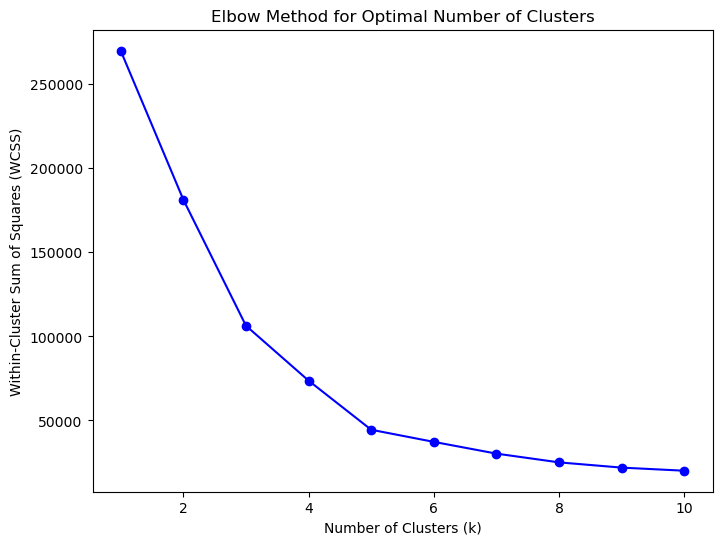

In [10]:
# Calculate WCSS for different values of k
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

Elbow point is 5

C:\Users\sarth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sarth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


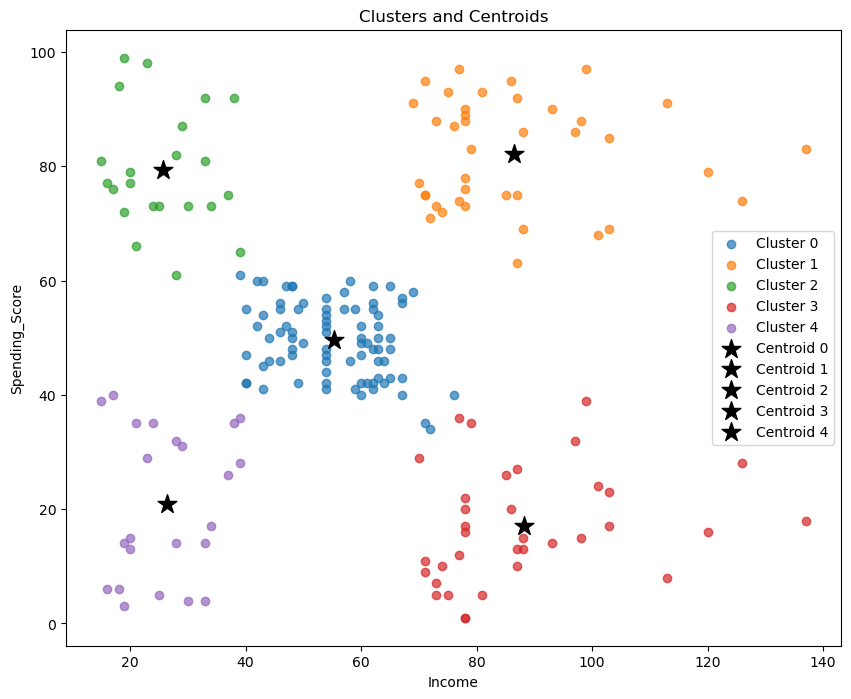

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


x = mall[['Income', 'Spending_Score']]

# Fit KMeans with the optimal number of clusters (5)
kmeans = KMeans(n_clusters=5, random_state=42)
mall['Cluster'] = kmeans.fit_predict(x)

# Plot the clusters and centroids
plt.figure(figsize=(10, 8))

# Scatter plot for each cluster
for cluster in range(5):
    cluster_data = mall[mall['Cluster'] == cluster]
    plt.scatter(cluster_data['Income'], cluster_data['Spending_Score'], label=f'Cluster {cluster}', alpha=0.7)

# Plot centroids
Cluster_Centroid = kmeans.cluster_centers_
for i in range(5):
    plt.scatter(Cluster_Centroid[i][0], Cluster_Centroid[i][1], marker='*', s=200, c='black', label=f'Centroid {i}')

plt.title('Clusters and Centroids')
plt.xlabel('Income')
plt.ylabel('Spending_Score')
plt.legend()
plt.show()


Cluster 1 (Orange):

High income and high spending score.
This cluster represents customers with high purchasing power who also actively spend.
Business Implication: Targeted marketing strategies for premium products or exclusive services may be effective for this group.

Cluster 0 (Blue):

Moderate income and moderate spending score.
Customers in this cluster have a balanced income and spending behavior.
Business Implication: Targeted promotions, loyalty programs, or personalized recommendations can encourage these customers to increase their spending.

Cluster 2 (Green):

Low income and high spending score.
Customers in this cluster spend a lot despite having a lower income.
Business Implication: To analyze the types of products or services this group is interested in, and offer cost-effective options to maintain their loyalty.

Cluster 4 (Purple):

Low income and low spending score.
This cluster represents customers with limited purchasing power who also spend less.
Business Implication: To focus on value-oriented offerings, discounts, or entry-level products to attract and retain customers in this segment.

Cluster 3 (Red):

High income and low spending score.
Customers with high income but conservative spending habits.
Business Implication: To understand the factors influencing their spending behavior, and tailor marketing strategies to encourage higher spending.